In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/18662691.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Datei einlesen und anzeigen:
df = pd.read_csv("/Users/carareusch/Desktop/TechsLabTeam2/TechsLabTeam2-3/Data/Raw/Hotel/hotel_bookings.csv", encoding="ISO-8859-1", sep=',')

pd.set_option('display.max_columns', None)
df.head(10)
#print(df.columns)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [3]:
#Anzahl der Gäste pro Buchung addieren:
df["total_guest_number"]= df["adults"]+df["children"]+df["babies"]
df["duration_of_stay"]= df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

#Data Cleaning
df= df[df["duration_of_stay"]!=0]
df = df[df["total_guest_number"]!=0]
df = df[df["is_canceled"]==0]

In [4]:
# DataFrame aktualisieren, um Zeilen mit Stornierungen zu entfernen
df = df[df['reservation_status'] != 'Canceled']
df["reservation_status"].value_counts()


reservation_status
Check-Out    74389
Name: count, dtype: int64

In [5]:
#Spalten nach Hotels gruppieren:
hotel_grp=df.groupby(["hotel"])

#Verschiedene Besuchergruppen für das Resort Hotel zählen:
resort_total= hotel_grp.get_group("Resort Hotel")["total_guest_number"].sum()
resort_children= hotel_grp.get_group("Resort Hotel")["children"].sum()
resort_babies= hotel_grp.get_group("Resort Hotel")["babies"].sum()
resort_adults=hotel_grp.get_group("Resort Hotel")["adults"].sum()

print("Total number of guests in the Resort Hotel: " + str(resort_total))
print("Total number of children in the Resort Hotel: " + str(resort_children))
print("Total number of babies in the Resort Hotel: " + str(resort_babies))
print("Total nubmer of adults in the the Resort Hotel: " + str(resort_adults))

Total number of guests in the Resort Hotel: 55867.0
Total number of children in the Resort Hotel: 3040.0
Total number of babies in the Resort Hotel: 450
Total nubmer of adults in the the Resort Hotel: 52377


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/3572926828.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  resort_total= hotel_grp.get_group("Resort Hotel")["total_guest_number"].sum()
/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/3572926828.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  resort_children= hotel_grp.get_group("Resort Hotel")["children"].sum()
/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/3572926828.py:7: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  resort_babi

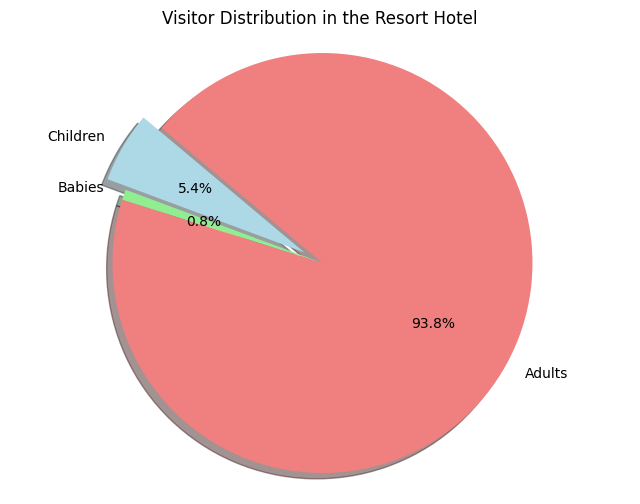

In [6]:
# Daten für das Tortendiagramm
labels = ['Children', 'Babies', 'Adults']
sizes = [resort_children, resort_babies, resort_adults]
colors = ['lightblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)  # Trennung des ersten Segments (Children)

# Erstellen des Tortendiagramms
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Visitor Distribution in the Resort Hotel')
plt.axis('equal')  # Gleichmäßige Aspekte gewährleisten

#Speichern:
plt.savefig("/Users/carareusch/Desktop/TechsLabTeam2/TechsLabTeam2-3/Code/Output/Figures/Visitor_Distribution_Resort 2.jpg", bbox_inches="tight", dpi=300)

# Anzeigen des Diagramms
plt.show()

In [7]:
#Verschiedene Besuchergruppen für das City Hotel zählen:
city_total= hotel_grp.get_group("City Hotel")["total_guest_number"].sum()
city_children= hotel_grp.get_group("City Hotel")["children"].sum()
city_babies= hotel_grp.get_group("City Hotel")["babies"].sum()
city_adults=hotel_grp.get_group("City Hotel")["adults"].sum()

print("Total number of guests in the City Hotel: " + str(city_total))
print("Total number of children in the City Hotel: " + str(city_children))
print("Total number of babies in the City Hotel: " + str(city_babies))
print("Total nubmer of adults in the the City Hotel: " + str(city_adults))

Total number of guests in the City Hotel: 89017.0
Total number of children in the City Hotel: 4604.0
Total number of babies in the City Hotel: 325
Total nubmer of adults in the the City Hotel: 84088


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/768840438.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  city_total= hotel_grp.get_group("City Hotel")["total_guest_number"].sum()
/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/768840438.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  city_children= hotel_grp.get_group("City Hotel")["children"].sum()
/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/768840438.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  city_babies= hotel_grp

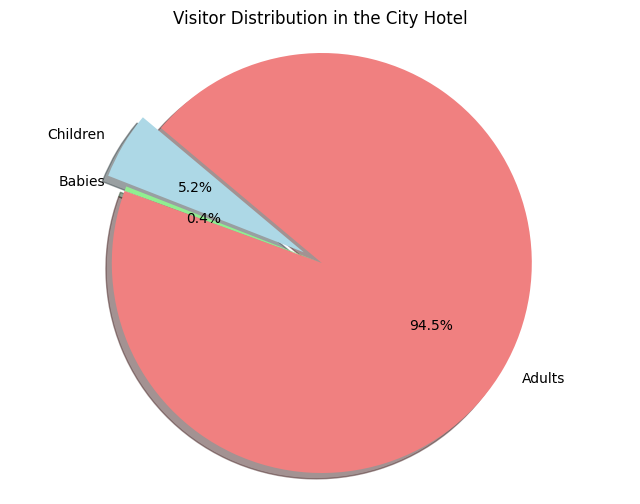

In [8]:
# Daten für das Tortendiagramm
labels = ['Children', 'Babies', 'Adults']
sizes = [city_children, city_babies, city_adults]
colors = ['lightblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)  # Trennung des ersten Segments (Children)

# Erstellen des Tortendiagramms
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Visitor Distribution in the City Hotel')
plt.axis('equal')  # Gleichmäßige Aspekte gewährleisten

#Speichern
plt.savefig("/Users/carareusch/Desktop/TechsLabTeam2/TechsLabTeam2-3/Code/Output/Figures/Visitor_Distribution_City 2.jpg", bbox_inches="tight", dpi=300)

# Anzeigen des Diagramms
plt.show()

In [9]:
#Mittelwert für die Gästezahl berechnen:
city_mean= hotel_grp.get_group("City Hotel")["total_guest_number"].mean()
resort_mean=hotel_grp.get_group("Resort Hotel")["total_guest_number"].mean()

print("The mean number of guests in the City Hotel is: " + str(city_mean))
print("the mean number of guests in the Resort Hotel is " + str(resort_mean))

The mean number of guests in the City Hotel is: 1.9422032160233893
the mean number of guests in the Resort Hotel is 1.9564014567866648


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/3145264143.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  city_mean= hotel_grp.get_group("City Hotel")["total_guest_number"].mean()
/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/3145264143.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  resort_mean=hotel_grp.get_group("Resort Hotel")["total_guest_number"].mean()


In [10]:

hotel_guests= resort_total + city_total

# Daten für das Sunburst-Diagramm
labels = [ "Hotel",'Resort', 'City', 'Resort Babies', 'Resort Children', 'Resort Adults', 'City Babies', 'City Children', 'City Adults']
parents = [None, "Hotel", "Hotel", 'Resort', 'Resort', 'Resort', 'City', 'City', 'City']
values = [233821, 79810, 154011, 555, 5120, 74135, 389, 7234, 146397]

# Farben für die Sektoren
colors = ['rgba(255,255,255,0)',      # Weiß für den äußeren Ring (Hotel)
          'rgba(44,160,101,0.5)',     # Grün für Resort Hotel
          'rgba(255,65,54,0.5)',      # Rot für City Hotel
          'rgba(44,160,101,0.1)',     # Sehr hellgrün für Resort Babies
          'rgba(44,160,101,0.3)',     # Hellgrün für Resort Children
          'rgba(44,160,101,0.8)',     # Dunkelgrün für Resort Adults
          'rgba(255,65,54,0.1)',      # Sehr hellrot für City Babies
          'rgba(255,65,54,0.3)',      # Hellrot für City Children
          'rgba(255,65,54,0.8)']      # Dunkelot für City Adults

# Erstellen des Sunburst-Diagramms
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    #branchvalues="total",  # Branchvalues: "total" zeigt die Summe aller Unterteilungen an
    marker=dict(colors=colors),
))

# Layout-Anpassungen
fig.update_layout(
    title='Verteilung der Gäste und Altersgruppen in den Hotels',
   margin=dict(t=50, l=50, r=50, b=50)) # Anpassen der Ränder

# Anzeigen des Diagramms
fig.show()

In [11]:

import plotly.express as px
import plotly.io as pio

resort_kids = resort_children + resort_babies
city_kids = city_children + city_babies

# Daten vorbereiten
data = {
    "Hotel": ["Hotel", "Hotel", "Hotel", "Hotel"],
    "Branch": ["Resort", "Resort", "City", "City"],
    "Besuchergruppe": ["Adults", "Children & Babies", "Adults", "Children & Babies"],
    "Anzahl": [ resort_adults, resort_kids, city_adults, city_kids]
}

# Sunburst-Diagramm erstellen
fig = px.sunburst(
    data,
    path=["Hotel", "Branch", "Besuchergruppe"],
    values="Anzahl",
    title="Distribution of Guests by Age Group",
    hover_data=["Anzahl"],
    color_discrete_sequence=["blue", "green"],  # Hier die Farben ändern
)


# Anzahl als Textlabel anzeigen und Format anpassen
fig.update_traces(textinfo="label+value", texttemplate="%{label}: %{value:.0f}")


# Diagramm anzeigen und Größe anpassen
fig.update_layout(width=900, height=700)

# Diagramm als HTML-Datei speichern
#fig.write_html("/Users/carareusch/Desktop/TechsLabTeam2/TechsLabTeam2-3/Code/Output/Figures/Distribution_of_Hotel_Guests.html")

# Speichern des Diagramms als JPEG mit 300 DPI
fig.write_image("/Users/carareusch/Desktop/TechsLabTeam2/TechsLabTeam2-3/Code/Output/Figures/Distribution_of_Hotel_Guests 2.jpg", format="jpeg", scale=3)


# Diagramm anzeigen
fig.show()


In [12]:
#Wie lange bleiben Gäste mit Kindern in den Hotels:

# Entferne Zeilen mit Null-Werten in den Spalten "Children" oder "Babies"
df_children_only = df[(df['children'] != 0) & (df['babies'] != 0)]

#Neuen Dataframe wieder nach Hotels sortieren:
hotel_children_grp=df_children_only.groupby(["hotel"])

#Aufenthalt von Famililien für das Resort Hotel herausfinden:
stay_resort = hotel_children_grp.get_group("Resort Hotel")["duration_of_stay"].value_counts().to_dict()

sorted_stay_resort = dict(sorted(stay_resort.items()))


#Aufenthalt von Familien für das City Hotel herausfinden:
stay_city = hotel_children_grp.get_group("City Hotel")["duration_of_stay"].value_counts().to_dict()

sorted_stay_city = dict(sorted(stay_city.items()))

#Werte ausgeben:
print(sorted_stay_resort)
print(sorted_stay_city)



{1: 9, 2: 12, 3: 9, 4: 7, 5: 18, 6: 7, 7: 15, 8: 4, 9: 2}
{1: 18, 2: 14, 3: 12, 4: 7, 5: 4, 7: 1, 8: 1, 11: 1}


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/2491785351.py:10: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/2491785351.py:16: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



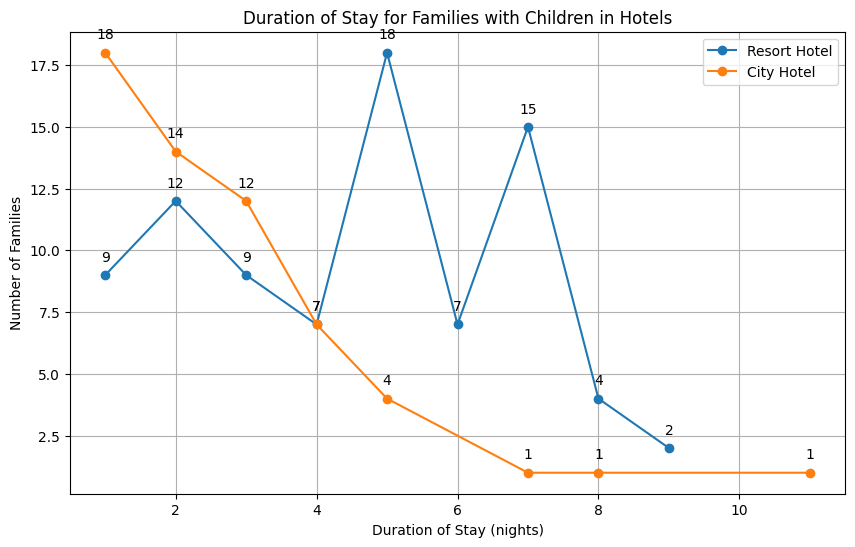

In [32]:
#Diagramm für die Aufenthaltsdauer der Familie erstellen:
# Daten für das Liniendiagramm
x_resort = list(sorted_stay_resort.keys())
y_resort = list(sorted_stay_resort.values())

x_city = list(sorted_stay_city.keys())
y_city = list(sorted_stay_city.values())

# Erstellen des Liniendiagramms
plt.figure(figsize=(10, 6))
plt.plot(x_resort, y_resort, marker='o', label='Resort Hotel')
plt.plot(x_city, y_city, marker='o', label='City Hotel')

# Diagrammtitel und Achsenbeschriftungen
plt.title('Duration of Stay for Families with Children in Hotels')
plt.xlabel('Duration of Stay (nights)')
plt.ylabel('Number of Families')

# Legende anzeigen
plt.legend()

#Datenpunktbeschriftung hinzufügen:

# Annotate x-Werte für Resort Hotel
for x, y in zip(x_resort, y_resort):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Annotate x-Werte für City Hotel
for x, y in zip(x_city, y_city):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.grid(True)

#Speichern:
plt.savefig("/Users/carareusch/Desktop/TechsLabTeam2/TechsLabTeam2-3/Code/Output/Figures/Duration_of_Stay_Families 2.jpg", bbox_inches="tight", dpi=300)

# Anzeigen des Diagramms
plt.show()

Welche Monate sind für Familen besonders beliebt?

In [14]:
#Welche Monate sind im Resort Hotel beliebt?:

# Benutzerdefinierte Sortierreihenfolge für die Monate
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

month_resort = hotel_children_grp.get_group("Resort Hotel")["arrival_date_month"].value_counts().to_dict()

#sorted_month_resort = dict(sorted(month_resort.items(), key=lambda x: x[1], reverse=True))
sorted_month_resort = {month: month_resort.get(month, 0) for month in month_order}


#Welche Monate sind im City Hotel bliebt?:
month_city = hotel_children_grp.get_group("City Hotel")["arrival_date_month"].value_counts().to_dict()

#sorted_month_city = dict(sorted(month_city.items(), key=lambda x: x[1], reverse=True))
sorted_month_city = {month: month_city.get(month, 0) for month in month_order}


#Werte ausgeben:
print(sorted_month_resort)
print(sorted_month_city)

{'January': 5, 'February': 6, 'March': 1, 'April': 6, 'May': 8, 'June': 9, 'July': 16, 'August': 20, 'September': 2, 'October': 3, 'November': 2, 'December': 5}
{'January': 4, 'February': 7, 'March': 4, 'April': 4, 'May': 0, 'June': 2, 'July': 7, 'August': 16, 'September': 5, 'October': 2, 'November': 0, 'December': 7}


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/1150132883.py:6: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/1150132883.py:13: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



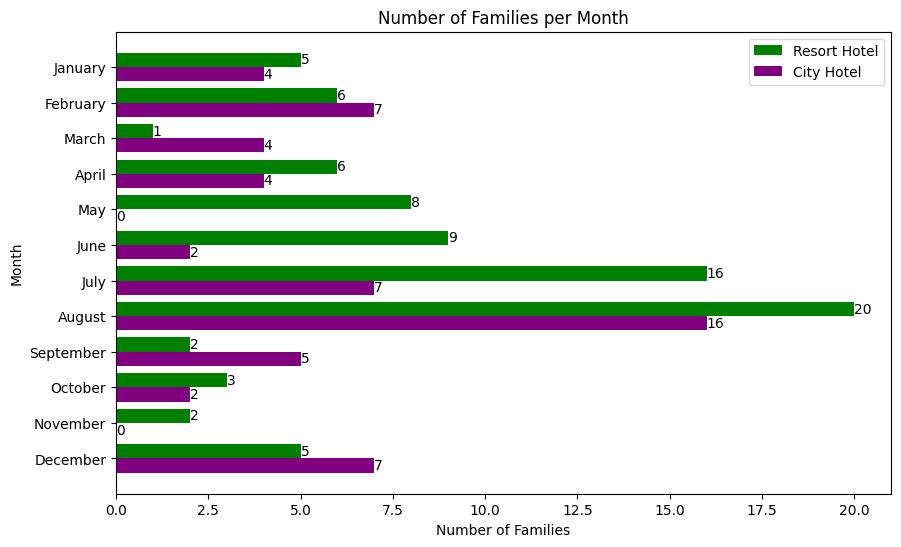

In [15]:
# Daten für das Diagramm
months_resort = list(sorted_month_resort.keys())
families_resort = list(sorted_month_resort.values())

months_city = list(sorted_month_city.keys())
families_city = list(sorted_month_city.values())

# Erstellen des Diagramms
plt.figure(figsize=(10, 6)) # Größe des Diagramms anpassen

# Positionen für die Balken
positions_resort = np.arange(len(months_resort))
positions_city = np.arange(len(months_city))

# Breite der Balken
bar_width = 0.4

# Säulendiagramm für das Resort Hotel
plt.barh(positions_resort - bar_width/2, families_resort, bar_width, color='green', label='Resort Hotel')

# Säulendiagramm für das City Hotel
plt.barh(positions_city + bar_width/2, families_city, bar_width, color='purple', label='City Hotel')

# Beschriftung der Balken mit den Werten am Ende
for i, (month, family) in enumerate(sorted_month_resort.items()):
    plt.text(family, i - bar_width/2, str(family), ha='left', va='center')

for i, (month, family) in enumerate(sorted_month_city.items()):
    plt.text(family, i + bar_width/2, str(family), ha='left', va='center')

# Beschriftung der Achsen
plt.yticks(np.arange(len(months_resort)), months_resort)
plt.xlabel('Number of Families')
plt.ylabel('Month')
plt.title('Number of Families per Month')
plt.legend()

#Umkehren der X-Achse (Damit das Diagramm nicht im Dezember beginnt)
plt.gca().invert_yaxis()

#Speichern:
plt.savefig("/Users/carareusch/Desktop/TechsLabTeam2/TechsLabTeam2-3/Code/Output/Figures/Families_per_month 2.jpg", bbox_inches="tight", dpi=300)

# Diagramm anzeigen
plt.show()

In [31]:
#Aus welchen Ländern kommen die Familien?

country_resort = hotel_children_grp.get_group("Resort Hotel")["country"].value_counts()
country_city = hotel_children_grp.get_group("City Hotel")["country"].value_counts()

print("Gesamtverteilung der Familien im Resort Hotel:")
print(country_resort)
print("Gesamtverteilung der Familien im City Hotel:")
print(country_city)

# Filtere den DataFrame für das City Hotel und den gewünschten Monat
city_hotel_month_filtered = df_children_only[(df['hotel'] == 'City Hotel') & (df['arrival_date_month'] == 'December')]

# Führe value_counts() für die "country"-Spalte durch
country_city_december = city_hotel_month_filtered["country"].value_counts()


#Gib die Ergebnisse aus
print("City Hotel Gäste im Dezember:")
print(country_city_december)

# Filtere den DataFrame für das Resort Hotel und den gewünschten Monaten:
resort_hotel_may_filtered = df_children_only[(df['hotel'] == 'Resort Hotel') & (df['arrival_date_month'] == 'May')]
resort_hotel_june_filtered = df_children_only[(df['hotel'] == 'Resort Hotel') & (df['arrival_date_month'] == 'June')]
resort_hotel_july_filtered = df_children_only[(df['hotel'] == 'Resort Hotel') & (df['arrival_date_month'] == 'July')]
resort_hotel_august_filtered = df_children_only[(df['hotel'] == 'Resort Hotel') & (df['arrival_date_month'] == 'August')]

# Führe value_counts() für die "country"-Spalte durch
resort_hotel_may = resort_hotel_may_filtered["country"].value_counts()
resort_hotel_june = resort_hotel_june_filtered["country"].value_counts()
resort_hotel_july = resort_hotel_july_filtered["country"].value_counts()
resort_hotel_august= resort_hotel_august_filtered["country"].value_counts()

print("Resort Hotel Familien im Mai:")
print(resort_hotel_may)
print("Resort Hotel Familien im Juni:")
print(resort_hotel_june)
print("Resort Hotel Familien im Juli:")
print(resort_hotel_july)
print("Resort Hotel Familien im August:")
print(resort_hotel_august)


Gesamtverteilung der Familien im Resort Hotel:
country
PRT    33
ESP    15
GBR    10
FRA     9
IRL     3
CHE     3
BRA     2
POL     2
RUS     1
NOR     1
MKD     1
NGA     1
GIB     1
ITA     1
Name: count, dtype: int64
Gesamtverteilung der Familien im City Hotel:
country
PRT    31
FRA     6
ITA     5
ESP     5
BRA     2
MAR     1
GBR     1
ROU     1
DEU     1
FIN     1
IND     1
EST     1
JPN     1
CN      1
Name: count, dtype: int64
City Hotel Gäste im Dezember:
country
PRT    5
FRA    1
ITA    1
Name: count, dtype: int64
Resort Hotel Familien im Mai:
country
PRT    3
GBR    3
ESP    1
ITA    1
Name: count, dtype: int64
Resort Hotel Familien im Juni:
country
PRT    3
GBR    3
ESP    2
CHE    1
Name: count, dtype: int64
Resort Hotel Familien im Juli:
country
PRT    7
CHE    2
ESP    2
NOR    1
BRA    1
GIB    1
FRA    1
GBR    1
Name: count, dtype: int64
Resort Hotel Familien im August:
country
PRT    10
ESP     3
FRA     3
GBR     2
RUS     1
IRL     1
Name: count, dtype: int64


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/2060691602.py:3: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/2060691602.py:4: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/2060691602.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/2060691602.py:23: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_1939/2060691602.py:24: UserWarning:

Boolean Series key will 

In [16]:
#Wie verhalten sich die Buchungen ohne Kinder?

#Dataframe anpassen, damit alle Buchungen mit Kindern oder babies wegfallen:
df_without_children = df[(df['children'] == 0) & (df['babies'] == 0) & (df["adults"] != 0)] #zusätzlich alle Buchungen rausnehmen, in denen adults null sind, da haben wir offenbar keine Werte

# DataFrame nach der Spalte "Hotel" gruppieren
hotel_grp_adults = df_without_children.groupby("hotel")


#Wie viele Buchungen mit nur einer Person (Dienstreise?) gibt es im Hotel?
# Zählen, wie oft die Zahl 1 in der Spalte "adults" für jedes Hotel separat vorkommt
adults_count_resort_one = hotel_grp_adults.get_group("Resort Hotel")["adults"].value_counts().get(1, 0)
adults_count_city_one = hotel_grp_adults.get_group("City Hotel")["adults"].value_counts().get(1, 0)

# Ausgabe der Ergebnisse
print("Anzahl der Buchungen mit nur einer Person im Resort Hotel:", adults_count_resort_one)
print("Anzahl der Buchungen mit nur einer Person mit im City Hotel:", adults_count_city_one)

#Wie verhalten sich die Buchungen in Bezug auf die Anzahl von Erwachsenen Personen insgesamt?
adults_count_resort = hotel_grp_adults.get_group("Resort Hotel")["adults"].value_counts()
adults_count_city = hotel_grp_adults.get_group("City Hotel")["adults"].value_counts()

# Ausgabe der Ergebnisse
print("Resort Hotel:", adults_count_resort)
print(" City Hotel:", adults_count_city)





Anzahl der Buchungen mit nur einer Person im Resort Hotel: 5726
Anzahl der Buchungen mit nur einer Person mit im City Hotel: 10107
Resort Hotel: adults
2    19465
1     5726
3      838
4       20
Name: count, dtype: int64
 City Hotel: adults
2    29290
1    10107
3     2885
4       24
Name: count, dtype: int64


In [17]:
# Liste der ungewöhnlichen Werte für Erwachsene im Resort Hotel
unusual_values_resort = [26, 27, 20, 40, 55, 10, 50]

# Extrahiere die Zeilen mit ungewöhnlichen Werten für Erwachsene im Resort Hotel
unusual_bookings_resort = df_without_children[(df_without_children['hotel'] == 'Resort Hotel') & (df_without_children['adults'].isin(unusual_values_resort))]

# Zeige die extrahierten Zeilen
display(unusual_bookings_resort)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guest_number,duration_of_stay
